In [9]:
import requests
import pandas as pd

# Define the correct API URL
url = "https://ecos.bok.or.kr/api/StatisticSearch/3F7IBQXCW4O3HZAWJJNR/json/kr/1/100/722Y001/D/20060101/20230315/0101000"

# Make the initial request to get the total count
response = requests.get(url)
result = response.json()

# Print result to see the structure in case of failure
print(result)

# Ensure that 'StatisticSearch' is in the response
if 'StatisticSearch' in result:
    list_total_count = int(result['StatisticSearch']['list_total_count'])
    list_count = (list_total_count // 100) + 1

    rows = []
    # Loop to get all data
    for i in range(0, list_count):
        start = str(i * 100 + 1)
        end = str((i + 1) * 100)
        
        # Correct the URL
        url = f"https://ecos.bok.or.kr/api/StatisticSearch/3F7IBQXCW4O3HZAWJJNR/json/kr/{start}/{end}/722Y001/D/20060101/20230315/0101000"
        
        response = requests.get(url)
        result = response.json()
        
        # Check if the expected key exists
        if 'StatisticSearch' in result:
            rows += result['StatisticSearch']['row']
        else:
            print(f"Error at {start}-{end}: {result}")

    # Create DataFrame
    df = pd.DataFrame(rows)
    print(df)
else:
    print("Error: 'StatisticSearch' key not found in the response")


{'StatisticSearch': {'list_total_count': 6282, 'row': [{'STAT_CODE': '722Y001', 'STAT_NAME': '1.3.1. 한국은행 기준금리 및 여수신금리', 'ITEM_CODE1': '0101000', 'ITEM_NAME1': '한국은행 기준금리', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '연%', 'WGT': None, 'TIME': '20060101', 'DATA_VALUE': '3.75'}, {'STAT_CODE': '722Y001', 'STAT_NAME': '1.3.1. 한국은행 기준금리 및 여수신금리', 'ITEM_CODE1': '0101000', 'ITEM_NAME1': '한국은행 기준금리', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '연%', 'WGT': None, 'TIME': '20060102', 'DATA_VALUE': '3.75'}, {'STAT_CODE': '722Y001', 'STAT_NAME': '1.3.1. 한국은행 기준금리 및 여수신금리', 'ITEM_CODE1': '0101000', 'ITEM_NAME1': '한국은행 기준금리', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '연%', 'WGT': None, 'TIME': '20060103', 'DATA_VALUE': '3.75'}, {'STAT

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Create a new DataFrame and avoid chain assignment
df1 = df[['ITEM_NAME1', 'TIME', 'DATA_VALUE']].copy()

# Convert TIME to a proper date format and assign it safely using .loc[]
df1.loc[:, 'date'] = pd.to_datetime(df1['TIME'].str[:4] + '-' + df1['TIME'].str[4:6] + '-' + df1['TIME'].str[6:8])

# Convert 'DATA_VALUE' to float
df1 = df1.astype({'DATA_VALUE': 'float'})

# Drop duplicates if needed
df1 = df1.drop_duplicates()

# Display the updated DataFrame
print(df1)


     ITEM_NAME1      TIME  DATA_VALUE       date
0     한국은행 기준금리  20060101        3.75 2006-01-01
1     한국은행 기준금리  20060102        3.75 2006-01-02
2     한국은행 기준금리  20060103        3.75 2006-01-03
3     한국은행 기준금리  20060104        3.75 2006-01-04
4     한국은행 기준금리  20060105        3.75 2006-01-05
...         ...       ...         ...        ...
6277  한국은행 기준금리  20230311        3.50 2023-03-11
6278  한국은행 기준금리  20230312        3.50 2023-03-12
6279  한국은행 기준금리  20230313        3.50 2023-03-13
6280  한국은행 기준금리  20230314        3.50 2023-03-14
6281  한국은행 기준금리  20230315        3.50 2023-03-15

[6282 rows x 4 columns]


In [14]:
df1 = df1.drop(["TIME"], axis =1)

# debt_final = df.drop(['2003년', '2004년','2005년'], axis =1)

In [15]:
df1.head()

,ITEM_NAME1,DATA_VALUE,date
0,한국은행 기준금리,3.75,2006-01-01
1,한국은행 기준금리,3.75,2006-01-02
2,한국은행 기준금리,3.75,2006-01-03
3,한국은행 기준금리,3.75,2006-01-04
4,한국은행 기준금리,3.75,2006-01-05


In [ ]:

import mysql.connector

def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host = host_name,
        port = 3306,
        user = user_name,
        password = user_password,
        database = "WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor
def close_database(mydb, cursor):
    cursor.close()
    mydb.close()
# 
def excute_query(query):
    mydb, cursor = connect_database()
    try:
        cursor.execute(query);
        if query.strip().lower().startswith("select"):
            return cursor.fetchall()
        else :
            mydb.commit()
            print("success!!!")
    except mysql.connector.Error as err:
        print(err)
    finally:
        close_database(mydb=mydb,cursor=cursor)


# excute_query("DROP TABLE base_interest_rate")
excute_query('create TABLE base_interest_rate (ITEM_NAME1 varchar(50), change_date date, DATA_VALUE float)')


success!!!


In [ ]:
import mysql.connector

def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor


def close_database(mydb, cursor):
    if cursor:
        cursor.close()
    if mydb.is_connected():
        mydb.close()


def excute_query(query):
    mydb, cursor = connect_database()
    result = []
    try:
        cursor.execute(query)

        # SELECT 및 SHOW 명령어일 경우
        if query.strip().lower().startswith(("select", "show")):
            result = cursor.fetchall()  # 모든 결과 가져오기

        else:
            mydb.commit()
            print("Query executed successfully!")

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        close_database(mydb, cursor)

    return result


# 테이블 목록 가져오기
query = "SHOW TABLES;"
tables = excute_query(query)

if tables:
    print("Tables in the database:")
    for table in tables:
        print(table)
else:
    print("No tables found or query failed.")



Tables in the database:
('HOUSE_PRICE_INDEX_APART',)
('HOUSE_SUPPLY',)
('HOUSE_SUPPLY_COPY',)
('SELL_PRICE_INDEX_APART',)
('base_interest_rate',)
('debt',)
('housing_supply',)
('jeonse_price_index',)
('loan_interest',)
('news_titles',)
('property_jeonse_ratio',)
('property_jeonse_ratio_copy',)
('property_price_index',)
('regions',)
('rent_conversion_rate',)
('rent_rate',)
('unsold_houses',)
('unsold_status',)
('your_table_name',)


In [ ]:
import mysql.connector

def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor


def close_database(mydb, cursor):
    if cursor:
        cursor.close()
    if mydb.is_connected():
        mydb.close()


def excute_query(query):
    mydb, cursor = connect_database()
    result = []
    try:
        cursor.execute(query)

        # SELECT 및 SHOW/DESC 명령어일 경우 결과를 모두 가져오기
        if query.strip().lower().startswith(("select", "show", "desc")):
            result = cursor.fetchall()  # 모든 결과 가져오기

        else:
            mydb.commit()
            print("Query executed successfully!")

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        # 커서를 닫기 전에 남아있는 결과가 있을 경우 모두 가져온 후 닫기
        if cursor.with_rows and cursor.rowcount > 0:
            cursor.fetchall()  # 남은 결과를 모두 가져옴
        close_database(mydb, cursor)

    return result


# 테이블 구조를 확인하기 위한 DESC 명령어 실행
query = "DESC base_interest_rate;"
table_description = excute_query(query)

# 테이블 구조 출력
if table_description:
    print("Description of base_interest_rate table:")
    for column in table_description:
        print(column)
else:
    print("No description found or query failed.")


Description of base_interest_rate table:
('ITEM_NAME1', 'varchar(50)', 'YES', '', None, '')
('change_date', 'date', 'YES', '', None, '')
('DATA_VALUE', 'float', 'YES', '', None, '')


In [ ]:
import mysql.connector
import pandas as pd

def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor

def close_database(mydb, cursor):
    cursor.close()
    mydb.close()

def excute_query(query, params=None):
    mydb, cursor = connect_database()
    try:
        if params:
            cursor.execute(query, params)  
        else:
            cursor.execute(query)
        if query.strip().lower().startswith("select"):
            return cursor.fetchall()
        else:
            mydb.commit()
            print("success!!!")
    except mysql.connector.Error as err:
        print(f"Error: {err}")
    finally:
        close_database(mydb=mydb, cursor=cursor)

df1 = pd.DataFrame(df1)


def insert_data():
    for i, row in df1.iterrows():
        query = """
            INSERT INTO base_interest_rate (ITEM_NAME1, change_date, DATA_VALUE)
            VALUES (%s, %s, %s )
        """
        params = (
            row['ITEM_NAME1'], row['date'], row['DATA_VALUE']
        )
        excute_query(query, params)

insert_data()

success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!
success!!!

In [ ]:
import mysql.connector

def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor


def close_database(mydb, cursor):
    if cursor:
        cursor.close()
    if mydb.is_connected():
        mydb.close()


def excute_query(query):
    mydb, cursor = connect_database()
    result = []
    try:
        cursor.execute(query)

        # SELECT 및 SHOW/DESC 명령어일 경우 결과를 모두 가져오기
        if query.strip().lower().startswith(("select", "show", "desc")):
            result = cursor.fetchall()  # 모든 결과 가져오기

        else:
            mydb.commit()
            print("Query executed successfully!")

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        # 커서를 닫기 전에 남아있는 결과가 있을 경우 모두 가져온 후 닫기
        if cursor.with_rows and cursor.rowcount > 0:
            cursor.fetchall()  # 남은 결과를 모두 가져옴
        close_database(mydb, cursor)

    return result


# 테이블 구조를 확인하기 위한 DESC 명령어 실행
query = "select * from base_interest_rate"
table_description = excute_query(query)

# 테이블 구조 출력
if table_description:
    print("Description of base_interest_rate table:")
    for column in table_description:
        print(column)
else:
    print("No description found or query failed.")

Description of base_interest_rate table:
('한국은행 기준금리', datetime.date(2006, 1, 1), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 2), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 3), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 4), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 5), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 6), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 7), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 8), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 9), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 10), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 11), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 12), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 13), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 14), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 15), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 16), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 17), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 18), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 19), 3.75)
('한국은행 기준금리', datetime.date(2006, 1, 20), 3.75)
('한국은행 기

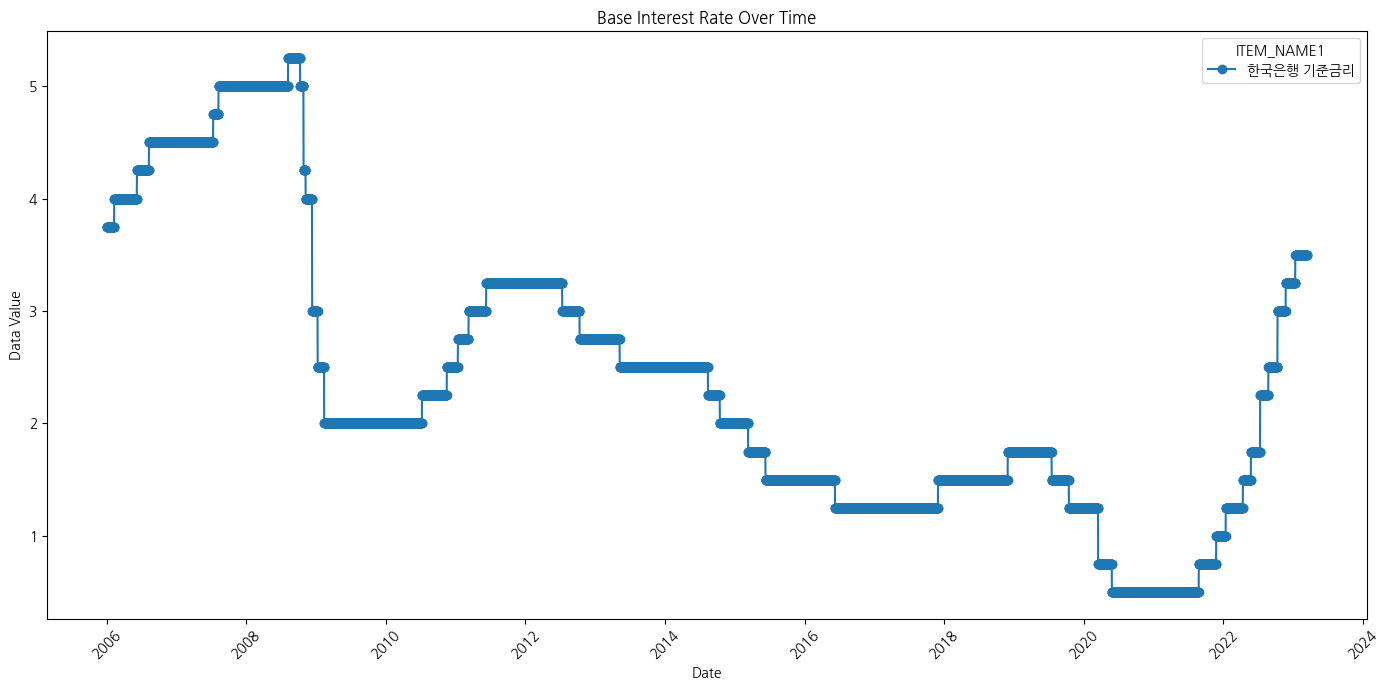

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 데이터베이스 연결 및 쿼리 실행
def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor

def excute_query(query):
    mydb, cursor = connect_database()
    result = []
    try:
        cursor.execute(query)
        result = cursor.fetchall()
    except mysql.connector.Error as err:
        print(f"Error: {err}")
    finally:
        cursor.close()
        mydb.close()
    return result

# base_interest_rate 테이블에서 데이터 가져오기
query = "SELECT `ITEM_NAME1`, `change_date`, `DATA_VALUE` FROM `base_interest_rate`;"
data = excute_query(query)

# 가져온 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['ITEM_NAME1', 'change_date', 'DATA_VALUE'])

# change_date를 datetime 형식으로 변환
df['change_date'] = pd.to_datetime(df['change_date'])

# ITEM_NAME1별로 데이터를 그룹화하여 꺾은선형 그래프를 그리기
plt.figure(figsize=(14, 7))

for item in df['ITEM_NAME1'].unique():
    # 각 ITEM_NAME1별로 데이터를 필터링
    item_data = df[df['ITEM_NAME1'] == item]
    
    # 꺾은선형 그래프 그리기
    plt.plot(item_data['change_date'], item_data['DATA_VALUE'], label=item, marker='o', linestyle='-')

# 그래프의 제목, 축 레이블 및 범례 추가
plt.title('Base Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.legend(title='ITEM_NAME1')
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

